In [1]:
# Import libraries

import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import numpy as np
import math

In [2]:
# Define fuzzy mapping function

def fuzzyAndMap(setA, setB):
    """
    Taken from equation 8.2 in "Introduction to Fuzzy Logic"
    
    Accepts two lists (fuzzy sets) as paramteters, and returns
    a 2D array of the relation between the two sets (Fuzzy AND).
    """
    fuzzyMap = np.empty((len(setA), len(setB)), dtype=float)
    for i in range(len(setA)):
        for j in range(len(setB)):
            fuzzyMap[i][j] = min(setA[i], setB[j])
    return fuzzyMap

# These two functions are used for testing the above function.
# Define gaussian function 
def blend2(d = 0.0, u = 1.0, s = 5.0):
    d = float(d)
    u = float(u)
    s = float(abs(s)) # make sure positive

    b = math.exp( - s * (d * d)/(u * u))

    return b

# Define polynomial function 
def blend3(d = 0.0, u = 1.0, s = 0.05): 
    d = float(d)
    u = float(u)
    s = min(1.0,float(abs(s))) # make sure positive <= 1.0

    b = s ** ((d * d)/(u * u))

    return b

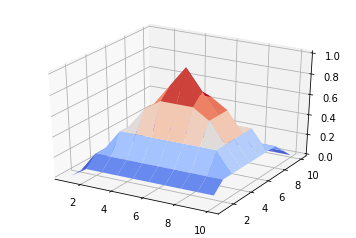

In [7]:
# Example of blending two sets to show the 3D graphing functions

# Create some data
testSetA = [0.1, 0.2, 0.4, 0.7, 1.0, 0.7, 0.4, 0.2, 0.1, 0]
testSetB = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2]

# Combine the two sets
testMap = fuzzyAndMap(testSetA, testSetB)

# Plot the data
fig = plt.figure()
ax = fig.gca(projection='3d')

axisX = np.arange(1, 11, 1)
axisY = np.arange(1, 11, 1)
axisX, axisY = np.meshgrid(axisX, axisY)

fuzzMap = ax.plot_surface(axisX, axisY, testMap, cmap=cm.coolwarm)

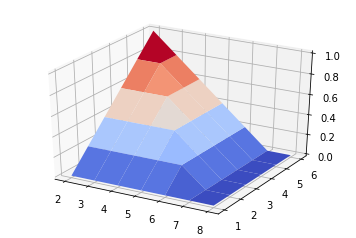

In [13]:
setA = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
setB = [0, 0, 0.2, 0.4, 0.6, 0.8, 1.0]

testMap = fuzzyAndMap(setA, setB)

# Plot the data
fig = plt.figure()
ax = fig.gca(projection='3d')

axisX = np.arange(8, 1, -1)
axisY = np.arange(1, 7, 1)
axisX, axisY = np.meshgrid(axisX, axisY)

fuzzMap = ax.plot_surface(axisX, axisY, testMap, cmap=cm.coolwarm)

[2.06115362e-09 1.44872049e-08 9.21360083e-08 5.30206120e-07
 2.76077257e-06 1.30072977e-05 5.54515994e-05 2.13900415e-04
 7.46585808e-04 2.35786201e-03 6.73794700e-03 1.74223746e-02
 4.07622040e-02 8.62935865e-02 1.65298888e-01 2.86504797e-01
 4.49328964e-01 6.37628152e-01 8.18730753e-01 9.51229425e-01
 1.00000000e+00 9.51229425e-01 8.18730753e-01 6.37628152e-01
 4.49328964e-01 2.86504797e-01 1.65298888e-01 8.62935865e-02
 4.07622040e-02 1.74223746e-02 6.73794700e-03 2.35786201e-03
 7.46585808e-04 2.13900415e-04 5.54515994e-05 1.30072977e-05
 2.76077257e-06 5.30206120e-07 9.21360083e-08 1.44872049e-08]


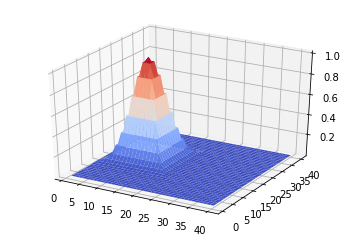

In [5]:
# Example of blending two gaussian sets

# Create some data
testSetA = np.arange(-2, 2, 0.1)
testSetB = np.arange(-1, 3, 0.1)

for i in range(len(testSetA)):
    testSetA[i] = blend2(d=testSetA[i] )
    
for i in range(len(testSetB)):
    testSetB[i] = blend2(d=testSetB[i] )

testMap = fuzzyAndMap(testSetA, testSetB)
testMap = np.array(testMap)

#print(testSetA, testSetB)
#print(testMap)
#print(len(testMap))

fig = plt.figure()
ax = fig.gca(projection='3d')

axisX = np.arange(1, 41, 1)
axisY = np.arange(1, 41, 1)

axisX, axisY = np.meshgrid(axisX, axisY)

fuzzMap = ax.plot_surface(axisX, axisY, testMap, cmap=cm.coolwarm)


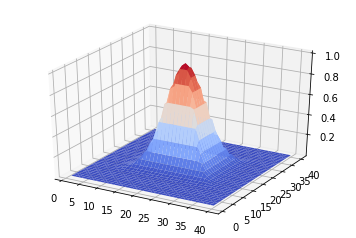

In [130]:
# Example of blending a gaussian set with a polynomial set

# Create some data
testSetA = np.arange(-2, 2, 0.1)
testSetB = np.arange(-2, 2, 0.1)

for i in range(len(testSetA)):
    testSetA[i] = blend2(d=testSetA[i] )
    
for i in range(len(testSetB)):
    testSetB[i] = blend3(d=testSetB[i] )

testMap = fuzzyAndMap(testSetA, testSetB)
testMap = np.array(testMap)

fig = plt.figure()
ax = fig.gca(projection='3d')

axisX = np.arange(1, 41, 1)
axisY = np.arange(1, 41, 1)

axisX, axisY = np.meshgrid(axisX, axisY)

fuzzMap = ax.plot_surface(axisX, axisY, testMap, cmap=cm.coolwarm)

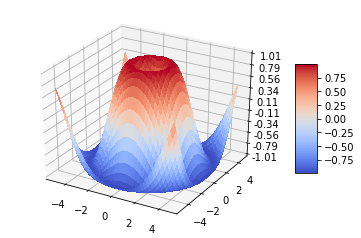

In [79]:
# Has nothing to do with fuzzy sets, this is the 
#  code from the tutorial I used to make the 3D graph


fig = plt.figure()
ax = fig.gca(projection='3d')

# create some data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()